# Modeling Diffusion from Inner Stream to Outer Stream

We again look at video `v360_co2_8987_017_050_0200_94_295_04_7.mp4` from August 29, 2020, this time modeling the diffusion of CO2 from the polyol-CO2 inner stream to the pure-polyol outer stream. 

In [1]:
# adds custom libraries to path
import sys
sys.path.append('../libs/')

# imports standard libraries
import numpy as np
import matplotlib.pyplot as plt

# imports custom libraries
import polyco2
import diffn
import flow

from importlib import reload
reload(polyco2)
reload(diffn)


# flow parameters
# viscosity of inner and outer streams [Pa.s]
eta_i = 0.25 # rough estimate of VORANOL 360 + CO2 dissolved so should be lower
eta_o = 4.815
# length of observation capillary [m]
L = 10E-2
# outer stream radius [m]
R_o = 150E-6
Q_o = 200/60E9 # outer stream flow rate, input to ISCO 260 D [m^3/s]
Q_i = 50/60E9 # inner stream flow rate, input to ISCO 100 DM [m^3/s]
p_s = 80E5 # saturation pressure of CO2 in VORANOL 360 [Pa]

# grid parameters
r_min = 0 # [m]
r_max = 150E-6 # outer radius [m]
N = 50 # number of grid spacings 
# computes mesh [m]
r_arr = np.linspace(r_min, r_max, N+1)

# diffusion model parameters 
dt = 10E-6 # time step [s]
dcdt_fn = diffn.calc_dcdt_cyl
bc_specs_list = [(diffn.neumann, 0, 1, 0, r_arr), (diffn.dirichlet, -1, 0)]
dc_c_s_frac = 0.01 # step size in concentration for estimating dD/dc as a fraction of saturation concentration

# load data (interfacial tension, solubility, and diffusivity) for polyols? we don't have data for VORANOL 360...use 1k3f
polyol_data_file = '1k3f_22c.csv'

# plot parameters
t_fs = 18
ax_fs = 16
tk_fs = 14
l_fs = 12

# CONVERSIONS
m_2_um = 1E6
m_2_mm = 1E3
s_2_ms = 1E3

### Set Initial Concentration Profile

We assume saturation in the inner stream up to the inner radius and no CO2 in the outer stream.

In [2]:
# computes properties of flow in observation capillary
_, R_i, v = flow.get_dp_R_i_v_max(eta_i, eta_o, L, Q_i, Q_o, R_o, SI=True)

# time at end of channel [s]
t_f = L/v

# creates initial concentration profile [kg CO2 / m^3 polyol-CO2]
c_0 = np.zeros([N+1])
c_s = polyco2.calc_c_s(p_s, polyol_data_file)
c_0[r_arr <= R_i] = c_s
dc = c_s*dc_c_s_frac

### Compute Diffusion of CO2 from Inner to Outer Stream

In [3]:
reload(polyco2)
reload(diffn)

t, c = diffn.go(dt, t_f, r_arr, list(c_0), dcdt_fn, bc_specs_list, dc, polyol_data_file)

t = 1e-05 s of 0.41 s.
t = 2e-05 s of 0.41 s.
t = 3e-05 s of 0.41 s.
t = 4e-05 s of 0.41 s.
t = 5e-05 s of 0.41 s.
t = 6e-05 s of 0.41 s.
t = 7e-05 s of 0.41 s.
t = 8e-05 s of 0.41 s.
t = 9e-05 s of 0.41 s.
t = 0.0001 s of 0.41 s.
t = 0.00011 s of 0.41 s.
t = 0.00012 s of 0.41 s.
t = 0.00013 s of 0.41 s.
t = 0.00014 s of 0.41 s.
t = 0.00015 s of 0.41 s.
t = 0.00016 s of 0.41 s.
t = 0.00017 s of 0.41 s.
t = 0.00018 s of 0.41 s.
t = 0.00019 s of 0.41 s.
t = 0.0002 s of 0.41 s.
t = 0.00021 s of 0.41 s.
t = 0.00022 s of 0.41 s.
t = 0.00023 s of 0.41 s.
t = 0.00024 s of 0.41 s.
t = 0.00025 s of 0.41 s.
t = 0.00026 s of 0.41 s.
t = 0.00027 s of 0.41 s.
t = 0.00028 s of 0.41 s.
t = 0.00029 s of 0.41 s.
t = 0.0003 s of 0.41 s.
t = 0.00031 s of 0.41 s.
t = 0.00032 s of 0.41 s.
t = 0.00033 s of 0.41 s.
t = 0.00034 s of 0.41 s.
t = 0.00035 s of 0.41 s.
t = 0.00036 s of 0.41 s.
t = 0.00037 s of 0.41 s.
t = 0.00038 s of 0.41 s.
t = 0.00039 s of 0.41 s.
t = 0.0004 s of 0.41 s.
t = 0.00041 s of 0.41 

t = 0.0035 s of 0.41 s.
t = 0.0035 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0036 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0037 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0038 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 0.41 s.
t = 0.0039 s of 

t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0071 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0072 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0073 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0074 s of 0.41 s.
t = 0.0075 s of 0.41 s.
t = 0.0075 s of 0.41 s.
t = 0.0075 s of 

t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s of 0.41 s.
t = 0.011 s

t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.014 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s of 0.41 s.
t = 0.015 s

t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s of 0.41 s.
t = 0.018 s

t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s of 0.41 s.
t = 0.022 s

t = 0.025 s of 0.41 s.
t = 0.025 s of 0.41 s.
t = 0.025 s of 0.41 s.
t = 0.025 s of 0.41 s.
t = 0.025 s of 0.41 s.
t = 0.025 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s of 0.41 s.
t = 0.026 s

t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.029 s of 0.41 s.
t = 0.03 s of 0.41 s.
t = 0.03 s o

t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s of 0.41 s.
t = 0.033 s

t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.036 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s of 0.41 s.
t = 0.037 s

t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.04 s of 0.41 s.
t = 0.041 s of 0.41 s.
t = 0.041 s of 0.41 s.
t = 0.041 s of 0.41 s.
t = 0.041 s of 0.41 s.
t = 0.041 s of 0.41 s.
t = 0.041 s of 0.41 s.
t = 0.041 s of 0.41 s.
t =

t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s of 0.41 s.
t = 0.044 s

t = 0.047 s of 0.41 s.
t = 0.047 s of 0.41 s.
t = 0.047 s of 0.41 s.
t = 0.047 s of 0.41 s.
t = 0.047 s of 0.41 s.
t = 0.047 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s of 0.41 s.
t = 0.048 s

t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s of 0.41 s.
t = 0.051 s

t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s of 0.41 s.
t = 0.055 s

t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.058 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s of 0.41 s.
t = 0.059 s

t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s of 0.41 s.
t = 0.062 s

t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s of 0.41 s.
t = 0.066 s

t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.069 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.
t = 0.07 s of 0.41 s.


t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s of 0.41 s.
t = 0.073 s

t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s of 0.41 s.
t = 0.077 s

t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.08 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t = 0.081 s of 0.41 s.
t 

t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s of 0.41 s.
t = 0.084 s

t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s of 0.41 s.
t = 0.088 s

t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.091 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s of 0.41 s.
t = 0.092 s

t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s of 0.41 s.
t = 0.095 s

t = 0.098 s of 0.41 s.
t = 0.098 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s of 0.41 s.
t = 0.099 s

t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 0.41 s.
t = 0.1 s of 

t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s

t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s

t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s of 0.41 s.
t = 0.11 s

t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s

t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s of 0.41 s.
t = 0.12 s

t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s

t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s

t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s of 0.41 s.
t = 0.13 s

t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s

t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s

t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s of 0.41 s.
t = 0.14 s

t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s

t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s of 0.41 s.
t = 0.15 s

t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s

t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s

t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s of 0.41 s.
t = 0.16 s

t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s

t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s of 0.41 s.
t = 0.17 s

t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s

t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s

t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s of 0.41 s.
t = 0.18 s

t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s

t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s

t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s of 0.41 s.
t = 0.19 s

t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 

t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 0.41 s.
t = 0.2 s of 

t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s

t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s

t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s of 0.41 s.
t = 0.21 s

t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s

t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s of 0.41 s.
t = 0.22 s

t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s

t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s

t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s of 0.41 s.
t = 0.23 s

t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s

t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s

t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.24 s of 0.41 s.
t = 0.25 s

t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s

t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s of 0.41 s.
t = 0.25 s

t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s

t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s

t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s of 0.41 s.
t = 0.26 s

t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s

t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s

t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.27 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s

t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s

t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s of 0.41 s.
t = 0.28 s

t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s

t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s

t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s of 0.41 s.
t = 0.29 s

t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 

t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 0.41 s.
t = 0.3 s of 

t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s

t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s

t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s of 0.41 s.
t = 0.31 s

t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s

t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s

t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.32 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s

t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s

t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s of 0.41 s.
t = 0.33 s

t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s

t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s

t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s of 0.41 s.
t = 0.34 s

t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s

t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s of 0.41 s.
t = 0.35 s

t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s

t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s

t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s of 0.41 s.
t = 0.36 s

t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s

t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s of 0.41 s.
t = 0.37 s

t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s

t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s

t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s of 0.41 s.
t = 0.38 s

t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s

t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s

t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.39 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t 

t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 

t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 0.41 s.
t = 0.4 s of 

t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s of 0.41 s.
t = 0.41 s

### Plot Results

(0.0, 454.1866940717206)

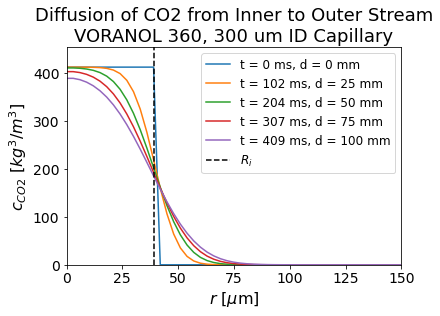

In [4]:
# initializes plot
fig = plt.figure()
ax = fig.add_subplot(111)

# define plot limits
x_lim = [0, R_o*m_2_um]
y_lim = [0, 1.1*c_s]

# plot desired concentration profiles
n_plot = 4
n_steps = len(t)
skip = int(n_steps / n_plot)

for i in range(0, n_steps, skip):
    ax.plot(r_arr*m_2_um, c[i], label='t = {0:d} ms, d = {1:d} mm'.format(int(t[i]*s_2_ms), int(v*t[i]*m_2_mm)))
    
ax.plot([R_i*m_2_um, R_i*m_2_um], y_lim, 'k--', label=r'$R_i$')
# formats plot
ax.set_title('Diffusion of CO2 from Inner to Outer Stream\nVORANOL 360, {0:d} um ID Capillary'.format(int(2*R_o*m_2_um)),
             fontsize=t_fs)
ax.set_xlabel(r'$r$ [$\mu$m]', fontsize=ax_fs)
ax.set_ylabel(r'$c_{CO2}$ [$kg^3$/$m^3$]', fontsize=ax_fs)
ax.tick_params(axis='both', labelsize=tk_fs)
plt.legend(fontsize=l_fs)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)